## 03장 파이토치 기초

### 3.1 텐선 생성

In [2]:
import torch

print(torch.tensor([1,2,3]))
print(torch.Tensor([[1,2,3],[4,5,6]]))
print(torch.LongTensor([1,2,3]))
print(torch.FloatTensor([1,2,3]))

tensor([1, 2, 3])
tensor([[1., 2., 3.],
        [4., 5., 6.]])
tensor([1, 2, 3])
tensor([1., 2., 3.])


### 3.2 텐서 속성

In [4]:
import torch

tensor = torch.rand(1,2)

print(tensor)
print(tensor.shape)
print(tensor.dtype)
print(tensor.device)

tensor([[0.8018, 0.9570]])
torch.Size([1, 2])
torch.float32
cpu


### 3.3 텐서 차원 변환

In [5]:
import torch

tensor = torch.rand(1,2)
print(tensor)
print(tensor.shape)

tensor = tensor.reshape(2,1)
print(tensor)
print(tensor.shape)

tensor([[0.6480, 0.5116]])
torch.Size([1, 2])
tensor([[0.6480],
        [0.5116]])
torch.Size([2, 1])


### 3.4 텐서 자료형 설정

In [6]:
import torch

tensor = torch.rand((3,30), dtype=torch.float)
print(tensor)

tensor([[0.0223, 0.1555, 0.8455, 0.4719, 0.4174, 0.1652, 0.8076, 0.8309, 0.4086,
         0.3867, 0.9393, 0.6362, 0.6140, 0.9962, 0.2926, 0.7379, 0.6427, 0.2811,
         0.0604, 0.9683, 0.5100, 0.2152, 0.0797, 0.8996, 0.8130, 0.6206, 0.6280,
         0.3635, 0.2570, 0.2156],
        [0.4045, 0.1312, 0.2687, 0.6685, 0.4174, 0.5641, 0.0943, 0.4454, 0.0716,
         0.2196, 0.5089, 0.2752, 0.2283, 0.8371, 0.1106, 0.4749, 0.2014, 0.8578,
         0.6743, 0.8525, 0.1592, 0.2377, 0.5397, 0.7565, 0.0272, 0.1489, 0.5155,
         0.7064, 0.0263, 0.1919],
        [0.3739, 0.6442, 0.7542, 0.1879, 0.5062, 0.5463, 0.4766, 0.5501, 0.4276,
         0.9960, 0.4190, 0.6664, 0.9763, 0.4113, 0.0457, 0.8962, 0.3142, 0.0932,
         0.0768, 0.3284, 0.7257, 0.0156, 0.4229, 0.8030, 0.9324, 0.6640, 0.4907,
         0.5032, 0.9529, 0.7857]])


### 3.5 텐서 GPU 장치 설정

In [7]:
import torch

device = "cuda" if torch.cuda.is_available() else "cpu"
cpu = torch.FloatTensor([1,2,3])
gpu = torch.FloatTensor([1,2,3]).to(device)
tensor = torch.rand((1,1), device=device)

print(device)
print(cpu)
print(gpu)
print(tensor)

cuda
tensor([1., 2., 3.])
tensor([1., 2., 3.], device='cuda:0')
tensor([[0.2377]], device='cuda:0')


### 3.6 텐서 장치 변환

In [8]:
import torch

cpu = torch.FloatTensor([1,2,3])
gpu = cpu.cuda()
gpu2cpu = gpu.cpu()
cpu2gpu = cpu.to("cuda")

print(cpu)
print(gpu)
print(gpu2cpu)
print(cpu2gpu)

tensor([1., 2., 3.])
tensor([1., 2., 3.], device='cuda:0')
tensor([1., 2., 3.])
tensor([1., 2., 3.], device='cuda:0')


### 3.7 넘파이 배열의 텐서 변환

In [9]:
import torch
import numpy as np

ndarray = np.array([1,2,3], dtype = np.uint8)

print(torch.tensor(ndarray))
print(torch.Tensor(ndarray))
print(torch.from_numpy(ndarray))

tensor([1, 2, 3], dtype=torch.uint8)
tensor([1., 2., 3.])
tensor([1, 2, 3], dtype=torch.uint8)


### 3.8 텐서의 넘파이 배열 변환

In [13]:
import torch

tensor = torch.cuda.FloatTensor([1,2,3])
ndarray = tensor.detach().cpu().numpy()

print(ndarray)
print(type(ndarray))

[1. 2. 3.]
<class 'numpy.ndarray'>


### 3.9 성별에 따른 키 차이 검정

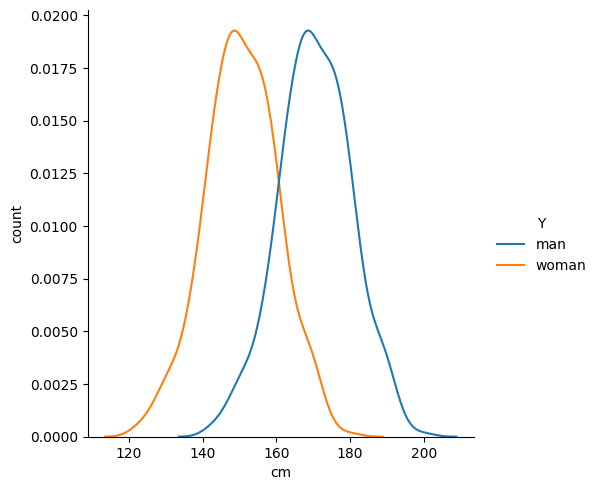

In [22]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
from matplotlib import pyplot as plt

man_height = stats.norm.rvs(loc=170, scale=10, size=500, random_state=1)
woman_height = stats.norm.rvs(loc=150, scale=10, size=500, random_state=1)

x = np.concatenate([man_height, woman_height])
y = ["man"] * len(man_height) + ["woman"] * len(woman_height)

df = pd.DataFrame(list(zip(x, y)), columns=["X", "Y"])
fig = sns.displot(df, x="X", hue="Y", kind="kde")
fig.set_axis_labels("cm", "count")
plt.show()

### 3.10 비쌍체 t-검정

In [23]:
statistic, pvalue = stats.ttest_ind(man_height, woman_height, equal_var=True)

print("statistic : ", statistic)
print("pvalue : ", pvalue)
print("*:", pvalue < 0.05)
print("**:", pvalue < 0.001)

statistic :  31.96162891312776
pvalue :  6.2285854381989205e-155
*: True
**: True


### 3.11 단순 선형 회귀(Simple Linear Regression: Numpy)

In [12]:
import numpy as np

x = np.array(
    [[1], [2], [3], [4], [5], [6], [7], [8], [9], [10],
    [11], [12], [13], [14], [15], [16], [17], [18], [19], [20],
    [21], [22], [23], [24], [25], [26], [27], [28], [29], [30]]
)
y = np.array(
    [[0.94], [1.98], [2.88], [3.92], [3.96], [4.55], [5.64], [6.3], [7.44], [9.1],
    [8.46], [9.5], [10.67], [11.16], [14], [11.83], [14.4], [14.25], [16.2], [16.32],
    [17.46], [19.8], [18], [21.34], [22], [22.5], [24.57], [26.04], [21.6], [28.8]]
)

In [13]:
weight = 0.0
bias = 0.0
learning_rate = 0.005

In [14]:
for epoch in range(10000):
  y_hat = weight * x + bias
  cost = ((y_hat - y) ** 2).mean()

  weight -= learning_rate * ((y_hat - y) * x).mean()
  bias -= learning_rate * (y_hat - y).mean()

  if(epoch + 1) % 1000 == 0:
    print(f"Epoch: {epoch+1:4d}, Weight: {weight:.3f}, Bias: {bias:.3f}, Cost: {cost:.3f}")


Epoch: 1000, Weight: 0.872, Bias: -0.290, Cost: 1.377
Epoch: 2000, Weight: 0.877, Bias: -0.391, Cost: 1.373
Epoch: 3000, Weight: 0.878, Bias: -0.422, Cost: 1.372
Epoch: 4000, Weight: 0.879, Bias: -0.432, Cost: 1.372
Epoch: 5000, Weight: 0.879, Bias: -0.435, Cost: 1.372
Epoch: 6000, Weight: 0.879, Bias: -0.436, Cost: 1.372
Epoch: 7000, Weight: 0.879, Bias: -0.436, Cost: 1.372
Epoch: 8000, Weight: 0.879, Bias: -0.436, Cost: 1.372
Epoch: 9000, Weight: 0.879, Bias: -0.436, Cost: 1.372
Epoch: 10000, Weight: 0.879, Bias: -0.436, Cost: 1.372


### 3.11 단순 선형 회귀(Simple Linear Regression: SGD)

In [9]:
import torch
from torch import optim

x = torch.FloatTensor([
    [1], [2], [3], [4], [5], [6], [7], [8], [9], [10],
    [11], [12], [13], [14], [15], [16], [17], [18], [19], [20],
    [21], [22], [23], [24], [25], [26], [27], [28], [29], [30]
])
y = torch.FloatTensor([
    [0.94], [1.98], [2.88], [3.92], [3.96], [4.55], [5.64], [6.3], [7.44], [9.1],
    [8.46], [9.5], [10.67], [11.16], [14], [11.83], [14.4], [14.25], [16.2], [16.32],
    [17.46], [19.8], [18], [21.34], [22], [22.5], [24.57], [26.04], [21.6], [28.8]
])

In [10]:
weight = torch.zeros(1, requires_grad=True)
bias = torch.zeros(1, requires_grad=True)
learning_rate = 0.001

In [12]:
optimizer = torch.optim.SGD([weight, bias], lr=learning_rate)

for epoch in range(10000):
  hypothesis = weight * x + bias
  cost = torch.mean((hypothesis - y) ** 2)

  optimizer.zero_grad()
  cost.backward()
  optimizer.step()

  if (epoch + 1) % 1000 == 0:
      print(f"Epoch : {epoch+1:4d}, Weight : {weight.item():.3f}, Bias : {bias.item():.3f}, Cost : {cost:.3f}")

Epoch : 1000, Weight : 0.870, Bias : -0.251, Cost : 1.380
Epoch : 2000, Weight : 0.873, Bias : -0.321, Cost : 1.375
Epoch : 3000, Weight : 0.875, Bias : -0.364, Cost : 1.373
Epoch : 4000, Weight : 0.877, Bias : -0.391, Cost : 1.373
Epoch : 5000, Weight : 0.878, Bias : -0.408, Cost : 1.372
Epoch : 6000, Weight : 0.878, Bias : -0.419, Cost : 1.372
Epoch : 7000, Weight : 0.878, Bias : -0.425, Cost : 1.372
Epoch : 8000, Weight : 0.879, Bias : -0.429, Cost : 1.372
Epoch : 9000, Weight : 0.879, Bias : -0.432, Cost : 1.372
Epoch : 10000, Weight : 0.879, Bias : -0.433, Cost : 1.372


### 3.25 zero_grad(), cost.backward(), optimizer.step()


In [11]:
import torch
from torch import optim


x = torch.FloatTensor([
    [1], [2], [3], [4], [5], [6], [7], [8], [9], [10],
    [11], [12], [13], [14], [15], [16], [17], [18], [19], [20],
    [21], [22], [23], [24], [25], [26], [27], [28], [29], [30]
])
y = torch.FloatTensor([
    [0.94], [1.98], [2.88], [3.92], [3.96], [4.55], [5.64], [6.3], [7.44], [9.1],
    [8.46], [9.5], [10.67], [11.16], [14], [11.83], [14.4], [14.25], [16.2], [16.32],
    [17.46], [19.8], [18], [21.34], [22], [22.5], [24.57], [26.04], [21.6], [28.8]
])

weight = torch.zeros(1, requires_grad=True)
bias = torch.zeros(1, requires_grad=True)
learning_rate = 0.001

optimizer = optim.SGD([weight, bias], lr=learning_rate)

for epoch in range(10000):
    hypothesis = weight * x + bias
    cost = torch.mean((hypothesis - y) ** 2)

    print(f"Epoch : {epoch+1:4d}")
    print(f"Step [1] : Gradient : {weight.grad}, Weight : {weight.item():.5f}")

    optimizer.zero_grad()
    print(f"Step [2] : Gradient : {weight.grad}, Weight : {weight.item():.5f}")

    cost.backward()
    print(f"Step [3] : Gradient : {weight.grad}, Weight : {weight.item():.5f}")

    optimizer.step()
    print(f"Step [4] : Gradient : {weight.grad}, Weight : {weight.item():.5f}")

    if epoch == 3:
        break

Epoch :    1
Step [1] : Gradient : None, Weight : 0.00000
Step [2] : Gradient : None, Weight : 0.00000
Step [3] : Gradient : tensor([-540.4854]), Weight : 0.00000
Step [4] : Gradient : tensor([-540.4854]), Weight : 0.54049
Epoch :    2
Step [1] : Gradient : tensor([-540.4854]), Weight : 0.54049
Step [2] : Gradient : None, Weight : 0.54049
Step [3] : Gradient : tensor([-198.9818]), Weight : 0.54049
Step [4] : Gradient : tensor([-198.9818]), Weight : 0.73947
Epoch :    3
Step [1] : Gradient : tensor([-198.9818]), Weight : 0.73947
Step [2] : Gradient : None, Weight : 0.73947
Step [3] : Gradient : tensor([-73.2604]), Weight : 0.73947
Step [4] : Gradient : tensor([-73.2604]), Weight : 0.81273
Epoch :    4
Step [1] : Gradient : tensor([-73.2604]), Weight : 0.81273
Step [2] : Gradient : None, Weight : 0.81273
Step [3] : Gradient : tensor([-26.9772]), Weight : 0.81273
Step [4] : Gradient : tensor([-26.9772]), Weight : 0.83970
